In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# If using Kaggle dataset
df = pd.read_csv("StudentsPerformance.csv")

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Preview dataset
print(df.shape)
df.head()


(1000, 8)


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Check missing values
print(df.isnull().sum())

# Check data types
print(df.info())

# Rename for convenience
df.rename(columns={
    'math_score': 'math',
    'reading_score': 'reading',
    'writing_score': 'writing'
}, inplace=True, errors='ignore')

# Descriptive stats
df.describe(include='all')


gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ 

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [4]:
# Convert scores to numpy arrays
math = np.array(df['math'])
reading = np.array(df['reading'])
writing = np.array(df['writing'])

# Calculate overall statistics
print("Average Math Score:", np.mean(math))
print("Highest Reading Score:", np.max(reading))
print("Lowest Writing Score:", np.min(writing))
print("Standard Deviation (Math):", np.std(math))

# Filter top-performing students
top_students = df[np.array(math > np.mean(math))]
top_students.head()


Average Math Score: 66.089
Highest Reading Score: 100
Lowest Writing Score: 10
Standard Deviation (Math): 15.155496659628149


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [5]:
# Average score by gender
avg_gender = df.groupby('gender')[['math', 'reading', 'writing']].mean().reset_index()

# Average score by parental education
avg_parent = df.groupby('parental_level_of_education')[['math', 'reading', 'writing']].mean().reset_index()

# Add an overall average column
df['average_score'] = df[['math', 'reading', 'writing']].mean(axis=1)

avg_gender, avg_parent.head()


(   gender       math    reading    writing
 0  female  63.633205  72.608108  72.467181
 1    male  68.728216  65.473029  63.311203,
   parental_level_of_education       math    reading    writing
 0          associate's degree  67.882883  70.927928  69.896396
 1           bachelor's degree  69.389831  73.000000  73.381356
 2                 high school  62.137755  64.704082  62.448980
 3             master's degree  69.745763  75.372881  75.677966
 4                some college  67.128319  69.460177  68.840708)

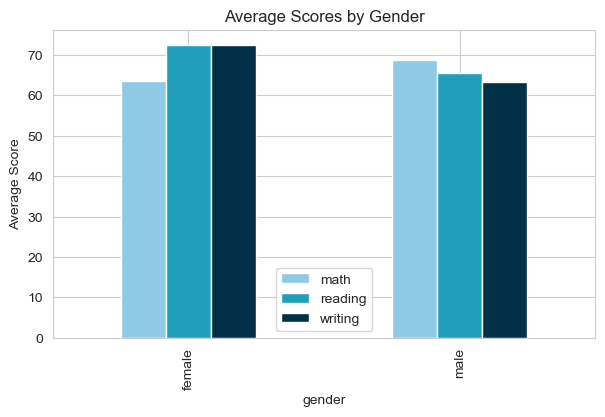

In [6]:
avg_gender.plot(x='gender', kind='bar', figsize=(7,4), color=['#8ecae6','#219ebc','#023047'])
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.show()


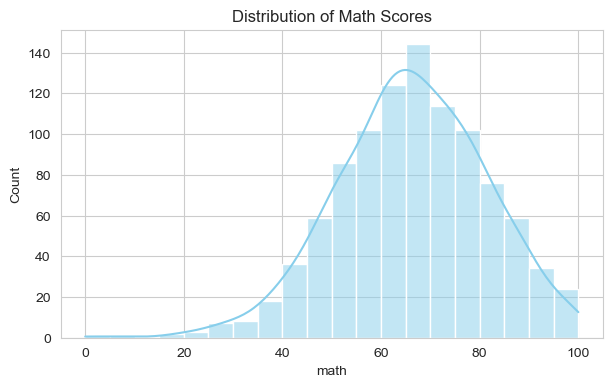

In [7]:
plt.figure(figsize=(7,4))
sns.histplot(df['math'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.show()


C:\Users\Hello\AppData\Local\Temp\ipykernel_6964\1452217575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental_level_of_education', y='writing', data=df, palette='pastel')


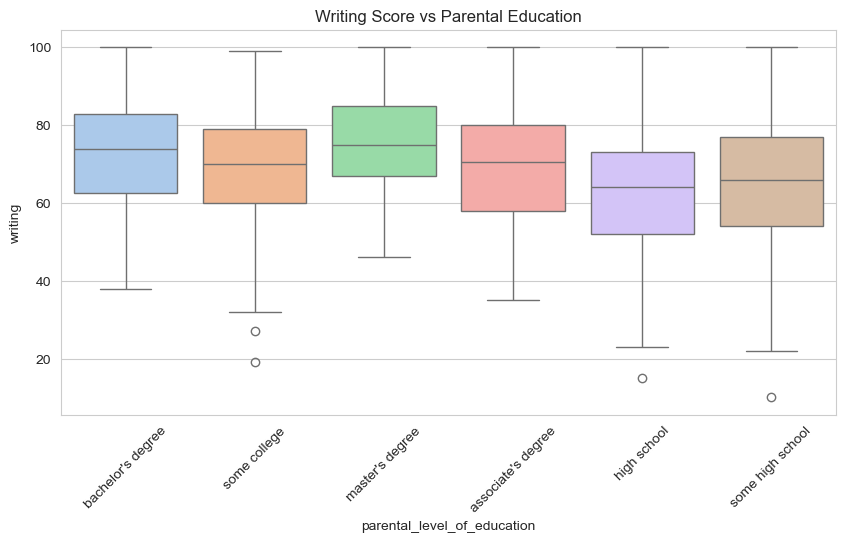

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='parental_level_of_education', y='writing', data=df, palette='pastel')
plt.xticks(rotation=45)
plt.title('Writing Score vs Parental Education')
plt.show()


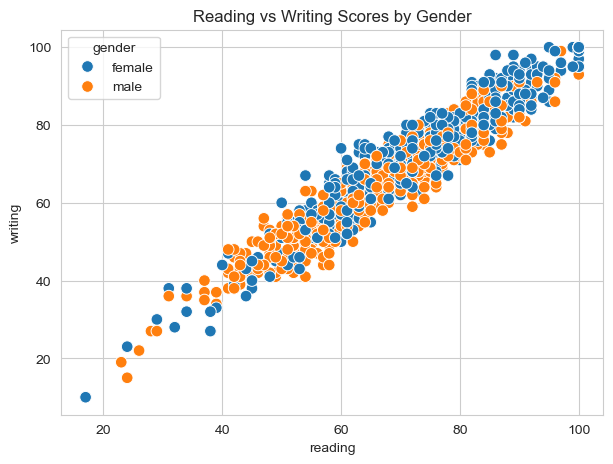

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='reading', y='writing', hue='gender', data=df, s=70)
plt.title('Reading vs Writing Scores by Gender')
plt.show()


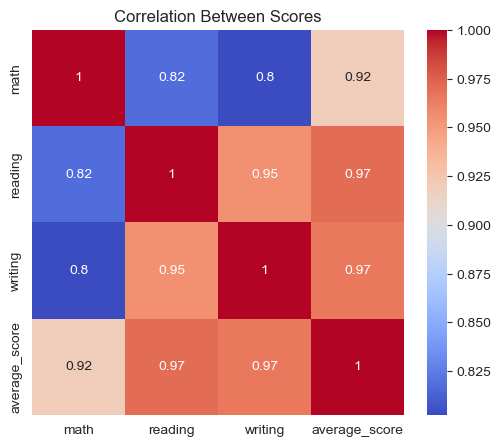

In [10]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()
